In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('iris.csv')
df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [3]:
df2 = df.drop(['Id', 'PetalLengthCm', 'PetalWidthCm', 'Species'], axis=1)
df2

,SepalLengthCm,SepalWidthCm
0,5.1,3.5
1,4.9,3.0
2,4.7,3.2
3,4.6,3.1
4,5.0,3.6
...,...,...
145,6.7,3.0
146,6.3,2.5
147,6.5,3.0
148,6.2,3.4


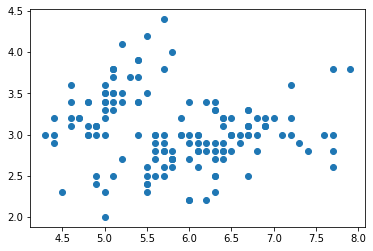

In [4]:
plt.scatter(df2.SepalLengthCm, df2.SepalWidthCm)

In [5]:
from sklearn.cluster import KMeans

In [6]:
k = KMeans(n_clusters  = 3)

In [7]:
y = k.fit_predict(df2)

In [8]:
y

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1])

In [9]:
df2['cluster'] = y

In [10]:
df2

,SepalLengthCm,SepalWidthCm,cluster
0,5.1,3.5,2
1,4.9,3.0,2
2,4.7,3.2,2
3,4.6,3.1,2
4,5.0,3.6,2
...,...,...,...
145,6.7,3.0,0
146,6.3,2.5,1
147,6.5,3.0,0
148,6.2,3.4,0


In [11]:
sf0 = df2[df2.cluster == 0]

In [13]:
sf1 = df2[df2.cluster == 1]
sf2 = df2[df2.cluster == 2]

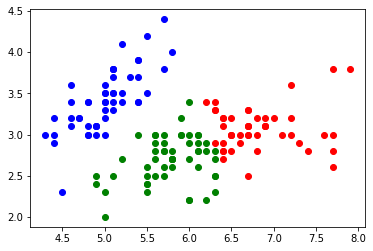

In [16]:
plt.scatter(sf0.SepalLengthCm, sf0.SepalWidthCm, color = 'red')
plt.scatter(sf1.SepalLengthCm, sf1.SepalWidthCm, color = 'green')
plt.scatter(sf2.SepalLengthCm, sf2.SepalWidthCm, color = 'blue')
plt.show()

In [18]:
sse = []
kr = range(1,10)
for k in kr:
    km = KMeans(n_clusters= k)
    km.fit(df2)
    sse.append(km.inertia_)


C:\Users\w-ZONE\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [19]:
sse

[227.1209333333333,
 90.61788341822299,
 37.12370212765958,
 29.729882481926886,
 22.59101055806938,
 17.495299175955562,
 15.401400589756046,
 14.103490908879648,
 12.38932370944468]

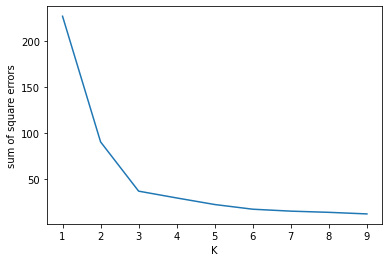

In [20]:
plt.xlabel('K')
plt.ylabel('sum of square errors')
plt.plot(kr, sse)
plt.show()